<a href="https://colab.research.google.com/github/tushar2704/Data-Science-Master/blob/main/linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [ ]:
#importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

Importing Advertising data

In [ ]:
from google.colab import files
data_to_upload = files.upload()

Saving Advertising.csv to Advertising (3).csv


In [ ]:
import io
advertising_data_1 = pd.read_csv(io.BytesIO(data_to_upload['Advertising.csv']))

Checking the data

In [ ]:
print(advertising_data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [ ]:
print(advertising_data_1.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


NOTE: All the values in the above data are in thousands ('000s)

Features/Variables:
*   TV
*   Radio
*   Newspaper
*   Sales

TV, Radio and Newspaper are "Input" Vars / Features
Sales is the "Output" var


In [ ]:
print(advertising_data_1.shape)

(200, 5)


NOTE: There are 200 rows and 5 columns in the data set (including the index column - having "0" as the header)

Each row represents a particular town/city (in general a particular market)


In [ ]:
print(advertising_data_1.tail())

     Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4


In [ ]:
print(advertising_data_1.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


# Visualize the relationship between features (input vars) and the target (output var)

Use Scatterplots


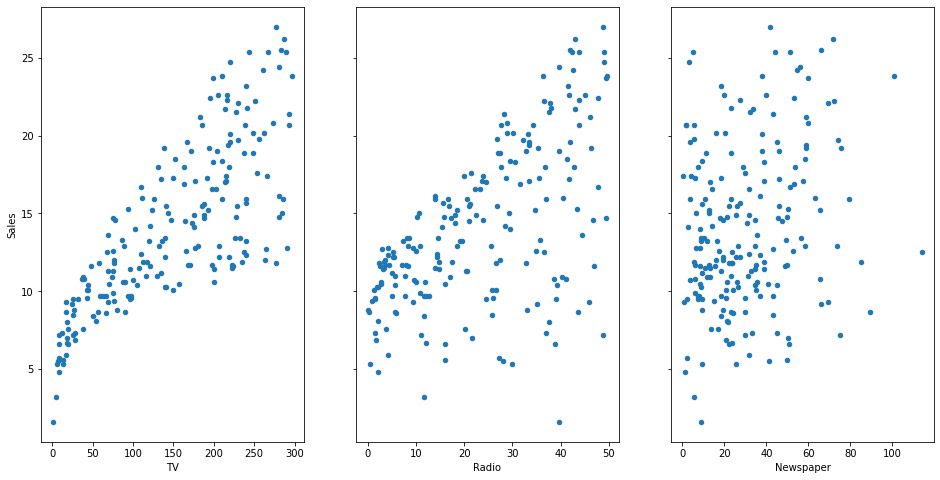

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)
advertising_data_1.plot(kind='scatter', x='TV', y='Sales', ax= axs[0], figsize = (16,8))
advertising_data_1.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], figsize=(16,8))
advertising_data_1.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], figsize=(16,8))

Questions that we can answer using Linear Regression
*   Is there a relationship between advertising amount (x variable/s) and sales (y var)
*   Strength of relationship - How much variation in sales can be explained by advertisement amount
*   Which type of advertisment channel contributes for increase/decrease in sales
*   Effect of each ad type on sales
*   Can we predict sales for a given amount spent on advertisments


Let us use "TV" ad spends to check the effect on sales


Create/build the model in one line of code

In [ ]:
lm = smf.ols(formula = 'Sales ~ TV', data = advertising_data_1).fit()

Getting the model coefficients

In [ ]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Manually doing predictions - E.g. Amount spent on TV ads is 50,000 dollars. What can be the expected sales?

Note: We need to enter only "50" and NOT "50,000" as the data we have used represents '000s


In [ ]:
7.032594 +  0.047537 * 50

9.409444

Using statsmodels to make predictions


*   Here we have to create a dataframe (df) because statsmodels formula interface expects a df


In [ ]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [ ]:
lm.predict(X_new)

0    9.409426
dtype: float64

Computing the P Values

In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

We can get the Confidence Interval (CI) for the model cofficients

In [ ]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Findind R squared

In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        02:30:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Plot the (least squares) line
*   Select the smallest and largest values in the x variable (TV adv spend) and then make predictions
*   Use the predicted values and plot the least squares line

Create a dataframe (df) with min & max value of "x" i.e. min & max of TV adv spend


In [ ]:
X_new = pd.DataFrame({"TV":[advertising_data_1.TV.min(), advertising_data_1.TV.max()]})
print(X_new.head())

      TV
0    0.7
1  296.4


Make predictions for the min & max value stored in the new df X_new and save/store them


In [ ]:
preds = lm.predict(X_new)
print(preds)

0     7.065869
1    21.122454
dtype: float64


Let us first plot the observed data (the data given in the data set), then plot the least squares line


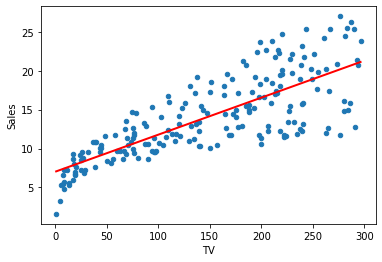

In [ ]:
advertising_data_1.plot(kind = 'scatter', x = 'TV', y = 'Sales', )
plt.plot(X_new, preds, c = 'red', linewidth = 2, )
plt.show()

#Multiple Linear Regression


Fitting the model with all the three "x" variables


In [ ]:
lm =  smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = advertising_data_1).fit()

Printing the coefficients


In [ ]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        02:30:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We notice that newspaper (advertisments) is not significantly influencing sales

Therefore, we can keep only those variables which are significantly impacting sales in our model

Let us build the model with only TV and Radio as the input variables or features


In [ ]:
lm =  smf.ols(formula = 'Sales ~ TV + Radio ', data = advertising_data_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           4.83e-98
Time:                        02:30:52   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

# Using Categorical Variables as predictors in the model

All the variables that we have used so far in the model are continuous


Let us create a new "Categorical" variable/feature called as "Size". Let this new variable contain values as "small" or "large"


Setting a random seed


In [ ]:
np.random.seed(111)

Creating / Generating random numbers

In [ ]:
nums = np.random.rand(len(advertising_data_1))
print(nums)

[0.61217018 0.16906975 0.43605902 0.76926247 0.2953253  0.14916296
 0.02247832 0.42022449 0.23868214 0.33765619 0.99071246 0.23772645
 0.08119266 0.66960024 0.62124292 0.27425353 0.46622141 0.11836775
 0.07395756 0.90077418 0.79396256 0.84056965 0.81520746 0.99095485
 0.57727383 0.81376692 0.42131788 0.02744796 0.45413664 0.10532609
 0.81722006 0.69772773 0.5652854  0.2742273  0.99847374 0.13804205
 0.61541569 0.4850363  0.40502704 0.7278491  0.32281393 0.40054555
 0.3189664  0.94722183 0.91870836 0.81384438 0.03407709 0.94337287
 0.95043916 0.80659105 0.48127804 0.96675923 0.41697908 0.31884013
 0.01644282 0.03818193 0.05308965 0.12796081 0.03338316 0.22642109
 0.54390891 0.17862581 0.17934478 0.14961322 0.68301313 0.46900855
 0.76824793 0.66881406 0.44126818 0.59522545 0.46165662 0.96326687
 0.14781138 0.90681313 0.49792484 0.59249847 0.68465799 0.17745066
 0.86468549 0.48208878 0.06934179 0.36473134 0.36150419 0.4720635
 0.17948485 0.17527984 0.9491296  0.65568231 0.13499553 0.92778

In [ ]:
mask_large = nums>0.5
print(mask_large)

[ True False False  True False False False False False False  True False
 False  True  True False False False False  True  True  True  True  True
  True  True False False False False  True  True  True False  True False
  True False False  True False False False  True  True  True False  True
  True  True False  True False False False False False False False False
  True False False False  True False  True  True False  True False  True
 False  True False  True  True False  True False False False False False
 False False  True  True False  True  True False False  True  True False
  True  True False  True False False False  True  True  True False  True
 False  True  True False  True  True False  True  True  True False False
  True False  True False  True False False False False False False  True
 False  True False  True  True  True  True False  True False False False
 False False  True False  True False  True  True False  True False  True
  True False  True False  True False  True  True  T

Creating a new var/feature called "Size" in our original dataframe


In [ ]:
advertising_data_1['Size'] = "Small"
advertising_data_1.loc[mask_large, 'Size'] = "Large"

In [ ]:
print(advertising_data_1.head(100))

    Unnamed: 0     TV  Radio  Newspaper  Sales   Size
0            1  230.1   37.8       69.2   22.1  Large
1            2   44.5   39.3       45.1   10.4  Small
2            3   17.2   45.9       69.3    9.3  Small
3            4  151.5   41.3       58.5   18.5  Large
4            5  180.8   10.8       58.4   12.9  Small
..         ...    ...    ...        ...    ...    ...
95          96  163.3   31.6       52.9   16.9  Small
96          97  197.6    3.5        5.9   11.7  Large
97          98  184.9   21.0       22.0   15.5  Large
98          99  289.7   42.3       51.2   25.4  Small
99         100  135.2   41.7       45.9   17.2  Large

[100 rows x 6 columns]


Create a new feature and name it "IsLarge"


In [ ]:
advertising_data_1['IsLarge'] = advertising_data_1.Size.map({"Small":0, "Large":1})


In [ ]:
print(advertising_data_1.head(11))

    Unnamed: 0     TV  Radio  Newspaper  Sales   Size  IsLarge
0            1  230.1   37.8       69.2   22.1  Large        1
1            2   44.5   39.3       45.1   10.4  Small        0
2            3   17.2   45.9       69.3    9.3  Small        0
3            4  151.5   41.3       58.5   18.5  Large        1
4            5  180.8   10.8       58.4   12.9  Small        0
5            6    8.7   48.9       75.0    7.2  Small        0
6            7   57.5   32.8       23.5   11.8  Small        0
7            8  120.2   19.6       11.6   13.2  Small        0
8            9    8.6    2.1        1.0    4.8  Small        0
9           10  199.8    2.6       21.2   10.6  Small        0
10          11   66.1    5.8       24.2    8.6  Large        1


In [ ]:
lm_1 = smf.ols(formula ='Sales ~ TV+Radio+Size+IsLarge', data = advertising_data_1).fit()

In [ ]:
lm_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.54e-96
Time:                        02:31:09   Log-Likelihood:                -386.16
No. Observations:                 200   AIC:                             780.3
Df Residuals:                     196   BIC:                             793.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9461      0.197      9.886      0.000       1.558       2.334
Size[T.Small]     1.0063      0.154      6.542      0.000       0.703       1.310
TV                0.0458      0.001     32.683      0.000       0.043       0.049
Radio             0.1878      0.008     23.161      0.000       0.172       0.204
IsLarge           0.9398      0.157      5.968      0.000       0.629       1.250
==============================================================================
Omnibus:                       60.613   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.926
Skew:                          -1.331   Prob(JB):                     1.02e-33
Kurtosis:                       6.338   Cond. No.                     7.50e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Creating and using a categorical var with >2 categories

Let us create a feature/var called "Area". Let this new var/feature contain 3 values - rural, suburban and urban



In [ ]:
np.random.seed(123)

Generating random numbers and assigning 3 categories


In [ ]:
nums = np.random.rand(len(advertising_data_1))
mask_urban = nums>0.66
mask_suburban = (nums>0.33) & (nums<0.66)
advertising_data_1['Area'] = "Rural"
advertising_data_1.loc[mask_urban, 'Area'] = "Ubran"
advertising_data_1.loc[mask_suburban, 'Area'] = "Suburban"
print(advertising_data_1)


     Unnamed: 0     TV  Radio  Newspaper  Sales   Size  IsLarge      Area
0             1  230.1   37.8       69.2   22.1  Large        1     Ubran
1             2   44.5   39.3       45.1   10.4  Small        0     Rural
2             3   17.2   45.9       69.3    9.3  Small        0     Rural
3             4  151.5   41.3       58.5   18.5  Large        1  Suburban
4             5  180.8   10.8       58.4   12.9  Small        0     Ubran
..          ...    ...    ...        ...    ...    ...      ...       ...
195         196   38.2    3.7       13.8    7.6  Small        0  Suburban
196         197   94.2    4.9        8.1    9.7  Small        0     Rural
197         198  177.0    9.3        6.4   12.8  Large        1     Ubran
198         199  283.6   42.0       66.2   25.5  Large        1  Suburban
199         200  232.1    8.6        8.7   13.4  Large        1     Rural

[200 rows x 8 columns]


Create dummy variables for "Area". Use get_dummies function

Note: We need to exclude the first dummy column

In [ ]:
area_dummies = pd.get_dummies(advertising_data_1, prefix= 'Area').iloc[:, 1:]

In [ ]:
print(area_dummies)

        TV  Radio  Newspaper  Sales  IsLarge  Area_Large  Area_Small  \
0    230.1   37.8       69.2   22.1        1           1           0   
1     44.5   39.3       45.1   10.4        0           0           1   
2     17.2   45.9       69.3    9.3        0           0           1   
3    151.5   41.3       58.5   18.5        1           1           0   
4    180.8   10.8       58.4   12.9        0           0           1   
..     ...    ...        ...    ...      ...         ...         ...   
195   38.2    3.7       13.8    7.6        0           0           1   
196   94.2    4.9        8.1    9.7        0           0           1   
197  177.0    9.3        6.4   12.8        1           1           0   
198  283.6   42.0       66.2   25.5        1           1           0   
199  232.1    8.6        8.7   13.4        1           1           0   

     Area_Rural  Area_Suburban  Area_Ubran  
0             0              0           1  
1             1              0           0  


Add/Concatenate the dummy variables with the original dataframe

Note: Use axis = 1 (axis = 0 means rows and axis = 1 means columns)


In [ ]:
advertising_data_1 = pd.concat([advertising_data_1,area_dummies] ,axis=1)
print(advertising_data_1.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales   Size  IsLarge      Area  \
0           1  230.1   37.8       69.2   22.1  Large        1     Ubran   
1           2   44.5   39.3       45.1   10.4  Small        0     Rural   
2           3   17.2   45.9       69.3    9.3  Small        0     Rural   
3           4  151.5   41.3       58.5   18.5  Large        1  Suburban   
4           5  180.8   10.8       58.4   12.9  Small        0     Ubran   

      TV  Radio  Newspaper  Sales  IsLarge  Area_Large  Area_Small  \
0  230.1   37.8       69.2   22.1        1           1           0   
1   44.5   39.3       45.1   10.4        0           0           1   
2   17.2   45.9       69.3    9.3        0           0           1   
3  151.5   41.3       58.5   18.5        1           1           0   
4  180.8   10.8       58.4   12.9        0           0           1   

   Area_Rural  Area_Suburban  Area_Ubran  
0           0              0           1  
1           1              0           0  

Building Multiple Linear Regression Model

In [ ]:
lm_2 = smf.ols(formula="Sales ~ TV + Radio + Newspaper + IsLarge + Area_Suburban + Area_Ubran", data=area_dummies).fit()

In [ ]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     288.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.54e-93
Time:                        02:31:21   Log-Likelihood:                -383.66
No. Observations:                 200   AIC:                             781.3
Df Residuals:                     193   BIC:                             804.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4998      0.400      6.257